## Crop planning optimization

In [ ]:
!pip3 install ortools

Optimal solution found
Total profit: 17500.0 euros
Crop plan:
wheat: 9 hectares
corn: 35 hectares
rice: 10 hectares
potato: 10 hectares
carrot: 10 hectares


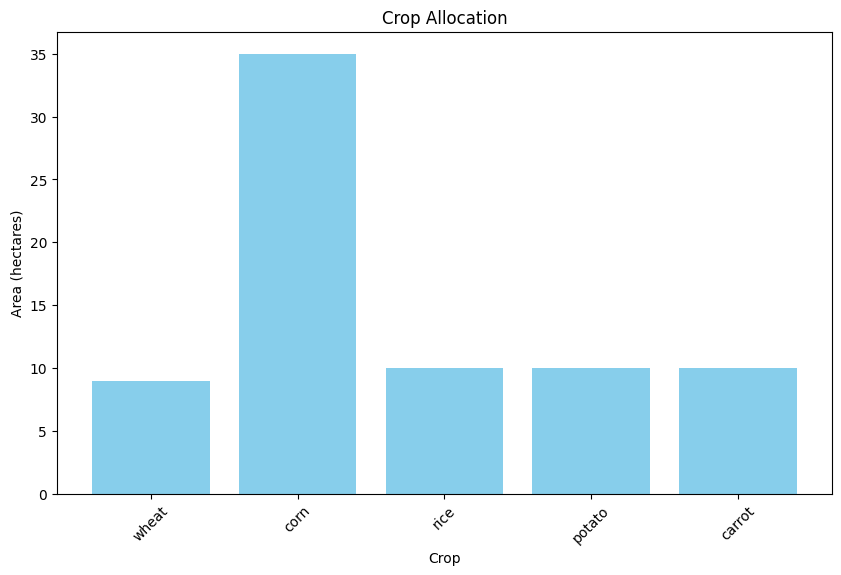

In [ ]:
# Import the libraries
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Create the data
data = {}
# The names of the crops to be planted
data['crops'] = ['wheat', 'corn', 'rice', 'potato', 'carrot']
# The profit per hectare of each crop (in euros)
data['profit'] = [200, 300, 250, 150, 100]
# The water requirement per hectare of each crop (in cubic meters)
data['water'] = [500, 600, 700, 400, 300]
# The number of crops
data['num_crops'] = len(data['crops'])
# The total area available for planting (in hectares)
data['area'] = 100
# The total water available for irrigation (in cubic meters)
data['water_budget'] = 40000
# The minimum and maximum area fraction for each crop (as percentage)
data['min_fraction'] = [10, 10, 10, 10, 10]
data['max_fraction'] = [40, 40, 40, 40, 40]

# Declare the MIP solver
solver = pywraplp.Solver.CreateSolver('SCIP')

# Create the variables
# x[i] = the area planted with crop i (in hectares)
x = {}
for i in range(data['num_crops']):
  x[i] = solver.NumVar(10, data['area'], f'x_{i}')

# Define the constraints
# The total area planted cannot exceed the available area
solver.Add(sum(x[i] for i in range(data['num_crops'])) <= data['area'])

# The total water used for irrigation cannot exceed the available water
solver.Add(sum(x[i] * data['water'][i] for i in range(data['num_crops'])) <= data['water_budget'])

# The area fraction for each crop must be within the specified percentage range defined by
# data['min_fraction'] and data['max_fraction']
for i in range(data['num_crops']):
  solver.Add(x[i] >= data['min_fraction'][i] / 100 * data['area'])
  solver.Add(x[i] <= data['max_fraction'][i] / 100 * data['area'])

# Define the objective
# Maximize the total profit
solver.Maximize(sum(x[i] * data['profit'][i] for i in range(data['num_crops'])))

# Solve the problem and print the solution
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Optimal solution found')
  print(f'Total profit: {solver.Objective().Value()} euros')
  print('Crop plan:')
  for i in range(data['num_crops']):
    print(f'{data["crops"][i]}: {int(x[i].solution_value())} hectares')
else:
  print('The problem does not have an optimal solution')




# Store the solution
solution = {data['crops'][i]: int(x[i].solution_value()) for i in range(data['num_crops'])}


# Plot the solution
plt.figure(figsize=(10, 6))
plt.bar(solution.keys(), solution.values(), color='skyblue')
plt.title('Crop Allocation')
plt.xlabel('Crop')
plt.ylabel('Area (hectares)')
plt.xticks(rotation=45)
plt.show()

